In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For reading building.yaml as a Python dict
import yaml # If you don't have this package use 'pip install pyyaml' into commandline or terminal


# Matplotlib Config
%matplotlib inline
plt.style.use('fivethirtyeight')

In [8]:
# Turn 'building.yaml' file into a python dictionary using PyYAML 

with open('Files/building.yaml') as f:
    building_data = f.read()
    building_data = yaml.load(building_data)
    f.close()

In [37]:
## See what keys exist in the dictionary
print(building_data.keys())

dict_keys(['building1'])


In [42]:
## There is only one key, which further has two keys - Type has one value 'obstacle' so we're interested in 'geometries'
print(building_data['building1'].keys())
print(building_data['building1']['type'])


## 'geometries' is a list with 6461 objects
print(type(building_data['building1']['geometries']))
print(len(building_data['building1']['geometries']))

dict_keys(['type', 'geometries'])
obstacle
<class 'list'>
6461


In [50]:
## Print first ten elements of the list
print(building_data['building1']['geometries'][:10])

[{'collision_geometry': {'dims': [4.150000000000006, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'config': {'orientation': [6.123233995736766e-17, 1.0, 0.0, 0.0], 'position': [114.325, -45.14, 7.5]}, 'name': 'NoName10'}, {'collision_geometry': {'dims': [3.6099999999999994, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'config': {'orientation': [0.7071067811865476, 0.7071067811865475, 0.0, 0.0], 'position': [116.4, -46.945, 7.5]}, 'name': 'NoName12'}, {'collision_geometry': {'dims': [47.69000000000001, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'config': {'orientation': [1.0, 0.0, 0.0, 0.0], 'position': [92.445, -62.4, 7.5]}, 'name': 'NoName19'}, {'collision_geometry': {'dims': [8.450000000000003, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'config': {'orientation': [6.123233995736766e-17, 1.0, 0.0, 0.0], 'position': [33.085, -63.02, 7.5]}, 'name': 'NoName26'}, {'collision_geometry': {'dims': [10.979999999999997, 0.15, 2.99], 'type': 'box', 'material': 'grey'}, 'confi

In [65]:
## 'type' seems interesting in the 'geometries' dictionary
## Iterate over the elements, add it to a list and use 'set' to get the unique 'types'

type_list = []
for i in building_data['building1']['geometries']:
    type_list.append(i['collision_geometry']['type'])
    
## Set gives you the unique elements in a list
print(set(type_list))

{'box', 'polygon'}


In [280]:
## Look at items that are of type 'box'
box_type = []
for i in building_data['building1']['geometries']:
    if i['collision_geometry']['type'] == 'box':
        box_type.append(i['name'])

#print(box_type)
## Most of them are NoName objects so let's look at type == 'polygons'

In [281]:
## Look at items that are of type 'polygon'
polygon_type = []
for i in building_data['building1']['geometries']:
    if i['collision_geometry']['type'] == 'polygon':
        polygon_type.append(i['name'])

#print(polygon_type)
## These look far more interesting from an entry/exit perspective. A lot more descriptive
## compared to type 'box'.

In [29]:
## Let's try another approach where we print out all 'names' that are not 'NoName' to see what different type of
## objects exist.

for i in range(0,len(building_data['building1']['geometries'])):
    if 'NoName' not in str(building_data['building1']['geometries'][i]['name']):
        print(building_data['building1']['geometries'][i]['name'])
        
## Pretty much the same result as the polygon/box differentiation.

entry__exit_4_58
radio_shack_69
casa_java_96
vacant_2_132
vacant_1_139
Hudson_News_Stand_199
men_s_room_256
info_booth_1_306
cake_boss_454
entry_exit_7_455
entry_exit_stairs_544
blue_and_red_stairwell_550
entry_exit_591
hudson_news_2_623
SF_office_1_668
Escalator_Second_7_2_679
Escalator_Second_7_3_712
Munchy_s_724
stair_D_729
_731
_751
vacant_1_805
hudson_news_2_807
sweet_factory_862
mrs__field_s_cookies_866
loading_dock_868
trash_871
exit_entry_1_1002
exit_entry_ramp_1004
Lobby_4_1008
Escalator_Second_5_1_1195
escalator_26_1281
1329
Aunty_Anne_s_1331
storage_room_1338
lottery_1347
passageway_3_1384
_1394
passageway_2_1406
passageway_1_1408
telephones_1423
escalator_and_entry_exit_1442
Bolton_s_1445
_1460
strawberry_1470
wl_stairwell_1471
elec_room_3_1502
Escalator_Second_6_2_1512
Escalator_Second_6_4_1520
Escalator_Second_6_3_1528
Escalator_Second_8_2_1539
cafe_metro_1545
ticket_1555
shortline_tickets_1564
Women_s_room_1594
Men_s_room_2_1621
hudson_news_and_storage_1639
Mcann_s_cafe_

In [134]:
## For an initial run, let's look at objects that have the words 'exit' 'entry' 'entrance' in their name
## and add their info to a list.
## There could be more than these entrances/exits with other names?? - this is just for a starting point

In [135]:
exit_entry_list = []

for i in range(0,len(building_data['building1']['geometries'])):
    for keyword in ['exit','entry','entrance']:
        if keyword in str(building_data['building1']['geometries'][i]['name']).lower():
            exit_entry_list.append(building_data['building1']['geometries'][i])

print(len(exit_entry_list))

26


In [282]:
exit_entry_list[:3]

[{'collision_geometry': {'material': 'off_white',
   'triangles': [100.6,
    -17.01,
    6.0,
    100.6,
    -11.75,
    6.0,
    92.88,
    -11.75,
    6.0,
    100.6,
    -17.01,
    6.0,
    92.88,
    -11.75,
    6.0,
    92.88,
    -17.01,
    6.0],
   'type': 'polygon'},
  'config': {'orientation': [0, 0, 0, 1], 'position': [0, 0, 0]},
  'isElevator': False,
  'name': 'entry__exit_4_58',
  'visualization_geometry': {'dims': [1e-07, 1e-07, 1e-07],
   'material': 'off_white',
   'type': 'box'}},
 {'collision_geometry': {'material': 'off_white',
   'triangles': [100.6,
    -17.01,
    6.0,
    100.6,
    -11.75,
    6.0,
    92.88,
    -11.75,
    6.0,
    100.6,
    -17.01,
    6.0,
    92.88,
    -11.75,
    6.0,
    92.88,
    -17.01,
    6.0],
   'type': 'polygon'},
  'config': {'orientation': [0, 0, 0, 1], 'position': [0, 0, 0]},
  'isElevator': False,
  'name': 'entry__exit_4_58',
  'visualization_geometry': {'dims': [1e-07, 1e-07, 1e-07],
   'material': 'off_white',
   'type

In [138]:
## So we'd probably be interested in the triangle coordiantes - Still need to figure out how these work
## Lets take the first element of our entry_exit list as test

In [145]:
test_coordinates = exit_entry_list[0]['collision_geometry']['triangles']

In [146]:
test_coordinates

[100.6,
 -17.01,
 6.0,
 100.6,
 -11.75,
 6.0,
 92.88,
 -11.75,
 6.0,
 100.6,
 -17.01,
 6.0,
 92.88,
 -11.75,
 6.0,
 92.88,
 -17.01,
 6.0]

In [147]:
# Every 3rd element is the Z element. Let's drop it for now and try to plot and see what this looks like

In [148]:
x = test[::3]
y = test[1::3]

In [149]:
df = pd.DataFrame(data={'x':x,'y':y})

In [152]:
df

,x,y
0,100.60,-17.01
1,100.60,-11.75
2,92.88,-11.75
3,100.60,-17.01
4,92.88,-11.75
5,92.88,-17.01


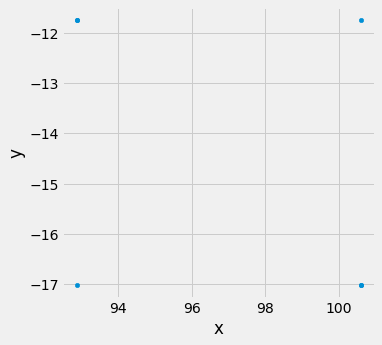

In [151]:
df.plot.scatter(x='x',y='y',figsize=(5,5))

In [265]:
# Convert list of Entrances/Exit to PANDAS Dataframe

df_list = []

# Iterate over the exit_entry_list to get 'names' and 'triangles' points
# Turn into dictionary and append to df_list for creation of dataframe

for i in exit_entry_list:
    coordinates = i['collision_geometry']['triangles']
    x = coordinates[::3]
    y = coordinates[1::3]
    z = coordinates[2::3]
    data = {'name' : i['name'],
           'x' : x,
           'y' : y,
           'z' : z
           }
    
    df_list.append(data)

# Create the dataframe
df = pd.DataFrame(df_list)
df.head(10)

,name,x,y,z
0,entry__exit_4_58,"[100.6, 100.6, 92.88, 100.6, 92.88, 92.88]","[-17.01, -11.75, -11.75, -17.01, -11.75, -17.01]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
1,entry__exit_4_58,"[100.6, 100.6, 92.88, 100.6, 92.88, 92.88]","[-17.01, -11.75, -11.75, -17.01, -11.75, -17.01]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
2,entry_exit_7_455,"[120.12, 122.93, 120.16, 120.12, 123.0, 122.93]","[60.33, 64.5, 64.5, 60.33, 60.28, 64.5]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
3,entry_exit_7_455,"[120.12, 122.93, 120.16, 120.12, 123.0, 122.93]","[60.33, 64.5, 64.5, 60.33, 60.28, 64.5]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
4,entry_exit_stairs_544,"[46.24, 53.04, 53.04, 46.24, 53.04, 46.08]","[9.3, 9.3, 17.1, 9.3, 17.1, 16.96]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
5,entry_exit_stairs_544,"[46.24, 53.04, 53.04, 46.24, 53.04, 46.08]","[9.3, 9.3, 17.1, 9.3, 17.1, 16.96]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
6,entry_exit_591,"[107.77, 107.42, 103.53, 103.54, 107.77, 107.7...","[10.18, 16.32, 16.7, 9.3, 8.9, 10.18, 9.3, 10....","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
7,entry_exit_591,"[107.77, 107.42, 103.53, 103.54, 107.77, 107.7...","[10.18, 16.32, 16.7, 9.3, 8.9, 10.18, 9.3, 10....","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
8,exit_entry_1_1002,"[32.3, 36.34, 32.3, 32.3, 36.36, 36.34]","[-20.64, -11.79, -11.75, -20.64, -20.75, -11.79]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
9,exit_entry_1_1002,"[32.3, 36.34, 32.3, 32.3, 36.36, 36.34]","[-20.64, -11.79, -11.75, -20.64, -20.75, -11.79]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"


In [268]:
# Convert to CSV for usage in other files
df.to_csv('entrance_exit_points.csv',index=False)